# **Projekt 1 - Przewidywanie demencji w oparciu o dane zdrowotne pacjenta**

# KM1 - Eksploracja danych

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Załadowanie danych o pacjentach

In [20]:
df = pd.read_csv('dementia_patients_health_data.csv')

### Podstawowe informacje o zbiorze danych

In [21]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 24
Number of rows: 1000


## Opis zmiennych

- 'Diabetic' - zmienna zerojedynkowa stwierdzająca obecność cukrzycy
- 'AlcoholLevel' - ilość alkoholu w promilach (numeryczna)
- 'HeartRate' - tętno w uderzeniach serca na minutę (numeryczna)
- 'BloodOxygenLevel' - % poziomu tlenu we krwi (między 96% a 99%) (numeryczna)
- 'BodyTemperature' - temperatura ciała w stopniach Celsjusza (numeryczna)
- 'Weight' - masa ciała w kilogramach (numeryczna)
- 'MRI_Delay' - parametr medyczny związany z rezonansem (numeryczna)
- 'Prescription' - zmienna kategoryczna, przepisany lek na demencję
- 'Dosage in mg', - ilość w miligramach leku na demencję (jeśli dotyczy) (numeryczna)
- 'Age' - wiek (numeryczna)
- 'Education_Level' - poziom edukacji (brak, podstawowe, średnie, wyższe) zamienione na 0 1/3 2/3 1
- 'Dominant_Hand' - dominująca ręka (left/right)
- 'Gender' - płeć zamieniona na zmienną zaerojedynkową (bycie kobietą)
- 'Family_History' - czy ktoś z rodziny chorował na demencję (Yes/No), zamieniona na zmienną zerojedynkową
- 'Smoking_Status' - status palacza (nigdy, kiedyś, obecnie) na 0 1/2 1
- 'APOE_ε4' - obecność białka odpowiedzialnego za chorobę Alzheimera (Positive/Negative) zamienione na zmienną zerojedynkową
- 'Physical_Activity' - tryb życia pod względem aktywności fizycznej (siedzący, łagodny, umiarkowany), zamienione na 0 1/2 1
- 'Depression_Status' - obecność depresji, zamienionę na zerojedynkową
- 'Cognitive_Test_Scores' - wynik w testach sprawdzających zdolności poznawcze
- 'Medication_History' - czy przyjmował leki na demencję (Yes/No) zamieniona na zerojedynkową
- 'Nutrition_Diet' - rodzaj diety (niskowęglowodanowa, zrównoważona, śródziemnomorska)
- 'Sleep_Quality' - jakość snu poor/good zamieniona na zerojedynkową (1 good, 0 poor)
- 'Chronic_Health_Conditions' - zmienna kategoryczna, choroby przewlekłe (choroba serca, nadciśnienie, cukrzyca, brak)
- 'Dementia', - zmienna zerojedynkowa - obecność demencji
<h3>Zmienne utworzone przy przekształceniu zmiennych</h3>

- 'Left_Hand' - zmienna zerojedynkowa (leworęczność)
- 'Diabetes' - zmienna zerojedynkowa - obecność cukrzycy
- 'Heart Disease' - zmienna zerojedynkowa - obecność chorób serca
- 'Hypertension' - zmienna zerojedynkowa - obecność nadciśnienia
- 'None' - zmienna zerojedynkowa - brak chorób 
- 'Balanced Diet' - zmienna zerojedynkowa - dieta zbalansowana
- 'Low-Carb Diet' - zmienna zerojedynkowa - dieta niskowęglowodanowa
- 'Mediterranean Diet' - zmienna zerojedynkowa - dieta śródziemnomorska
**Zmienne zerojedynkowe: rodzaj przyjmowanego leku na demencję:**
- 'Donepezil', 
- 'Galantamine', 
- 'Memantine', 
- 'Rivastigmine'

In [58]:
df.iloc[:, 0:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Diabetic          1000 non-null   int64   
 1   AlcoholLevel      1000 non-null   float64 
 2   HeartRate         1000 non-null   int64   
 3   BloodOxygenLevel  1000 non-null   float64 
 4   BodyTemperature   1000 non-null   float64 
 5   Weight            1000 non-null   float64 
 6   MRI_Delay         1000 non-null   float64 
 7   Prescription      485 non-null    object  
 8   Dosage in mg      485 non-null    float64 
 9   Age               1000 non-null   int64   
 10  Education_Level   1000 non-null   category
 11  Dominant_Hand     1000 non-null   object  
dtypes: category(1), float64(6), int64(3), object(2)
memory usage: 87.2+ KB


In [59]:
df.iloc[:, 12:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     1000 non-null   object  
 1   Family_History             1000 non-null   object  
 2   Smoking_Status             1000 non-null   object  
 3   APOE_ε4                    1000 non-null   object  
 4   Physical_Activity          1000 non-null   category
 5   Depression_Status          1000 non-null   object  
 6   Cognitive_Test_Scores      1000 non-null   int64   
 7   Medication_History         1000 non-null   object  
 8   Nutrition_Diet             1000 non-null   object  
 9   Sleep_Quality              1000 non-null   object  
 10  Chronic_Health_Conditions  1000 non-null   object  
 11  Dementia                   1000 non-null   int64   
dtypes: category(1), int64(2), object(9)
memory usage: 87.2+ KB


In [61]:
df.describe()  # opis zmiennych numerycznych

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [24]:
df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,None,1


In [64]:
missing_values = df.isna().sum().reset_index(name='NaN_Count')
missing_values[missing_values['NaN_Count'] > 0]

,index,NaN_Count
7,Prescription,515
8,Dosage in mg,515


In [65]:
len(df.drop_duplicates()) # brak duplikatów

1000

In [66]:
df.nunique() # sprawdzenie ile różnych wartości przyjmują zmienne

Diabetic                        2
AlcoholLevel                 1000
HeartRate                      41
BloodOxygenLevel             1000
BodyTemperature              1000
Weight                       1000
MRI_Delay                    1000
Prescription                    4
Dosage in mg                   10
Age                            31
Education_Level                 4
Dominant_Hand                   2
Gender                          2
Family_History                  2
Smoking_Status                  3
APOE_ε4                         2
Physical_Activity               3
Depression_Status               2
Cognitive_Test_Scores          11
Medication_History              2
Nutrition_Diet                  3
Sleep_Quality                   2
Chronic_Health_Conditions       4
Dementia                        2
dtype: int64

### Rozpoznanie kolumn ze zmiennymi ilościowymi i kategorycznymi (numerycznymi i nienumerycznymi)

In [54]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
quantitative_columns = [col for col in df.columns if df[col].nunique() > 11 or col == "Dosage in mg"]
categorical_numeric_columns = [col for col in numeric_df.columns if numeric_df[col].nunique() <= 11 and col != "Dosage in mg"]
categorical_non_numeric_columns = [col for col in df.columns if df[col].nunique() <= 4 and col not in categorical_numeric_columns]
print(f'Number of quantitative columns: {len(quantitative_columns)}')
print(f'Number of categorical numeric columns: {len(categorical_numeric_columns)}')
print(f'Number of categorical non-numeric columns: {len(categorical_non_numeric_columns)}')

Number of quantitative columns: 8
Number of categorical numeric columns: 3
Number of categorical non-numeric columns: 13


#### Zmienne ilościowe

In [55]:
quantitative_columns

['AlcoholLevel',
 'HeartRate',
 'BloodOxygenLevel',
 'BodyTemperature',
 'Weight',
 'MRI_Delay',
 'Dosage in mg',
 'Age']

#### Zmienne kategoryczne numeryczne

In [67]:
categorical_numeric_columns

['Diabetic', 'Cognitive_Test_Scores', 'Dementia']

#### Zmienne kategoryczne nienumeryczne

In [68]:
categorical_non_numeric_columns

['Prescription',
 'Education_Level',
 'Dominant_Hand',
 'Gender',
 'Family_History',
 'Smoking_Status',
 'APOE_ε4',
 'Physical_Activity',
 'Depression_Status',
 'Medication_History',
 'Nutrition_Diet',
 'Sleep_Quality',
 'Chronic_Health_Conditions']

### Wartości korelacji między zmienną 'demencja' a zmiennymi numerycznymi

In [69]:
correlation_matrix = numeric_df.dropna(axis=1).corr()
selected_correlation_matrix = correlation_matrix[['Dementia']].drop(['Dementia'])
selected_correlation_matrix

,Dementia
Diabetic,0.044815
AlcoholLevel,-0.003720
HeartRate,0.012276
BloodOxygenLevel,-0.071454
BodyTemperature,0.033928
Weight,-0.049563
MRI_Delay,0.031251
Age,-0.062154
Cognitive_Test_Scores,-0.843247


#### Heatmapa korelacji między zmienną 'demencja' a zmiennymi numerycznymi

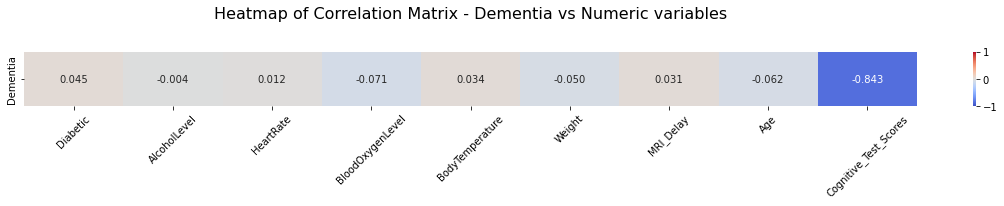

In [71]:
plt.figure(figsize=(20, 1))
sns.heatmap(selected_correlation_matrix.transpose(), annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix - Dementia vs Numeric variables', fontsize=16, y=1.5)
plt.xticks(rotation=45)
plt.show()

#### Heatmapa wzajemnych korelacji między zmiennymi numerycznymi (+ zmienną 'demencja')

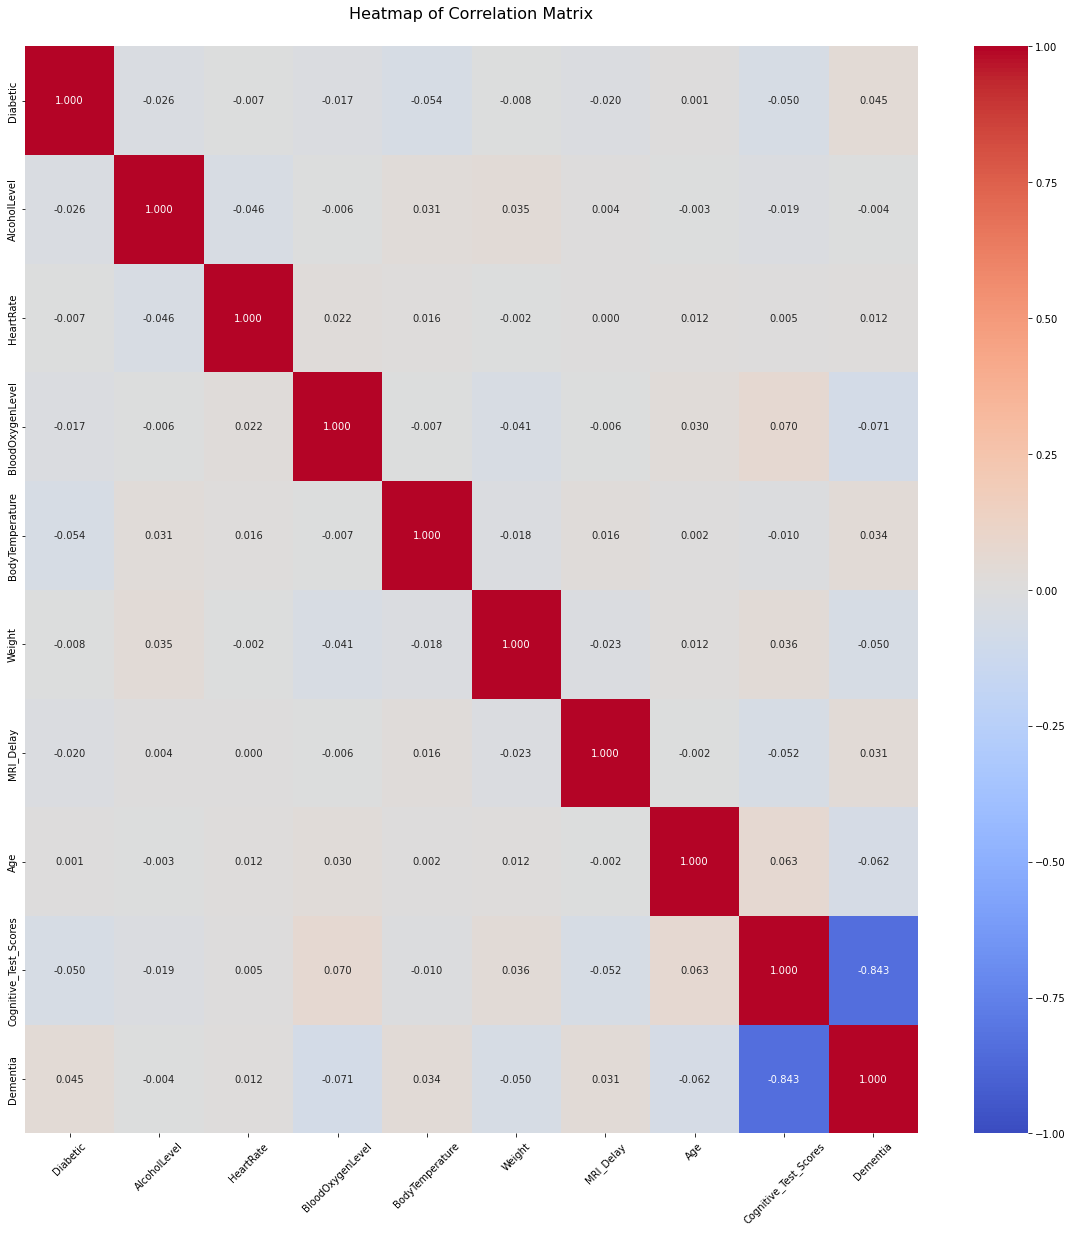

In [31]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix.transpose(), annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix', fontsize=16, y=1.02)
plt.xticks(rotation=45)
plt.show()

### Zliczenia wystąpień różnych wartości zmiennych kategorycznych ze zmienną 'demencja' równą 0 lub 1

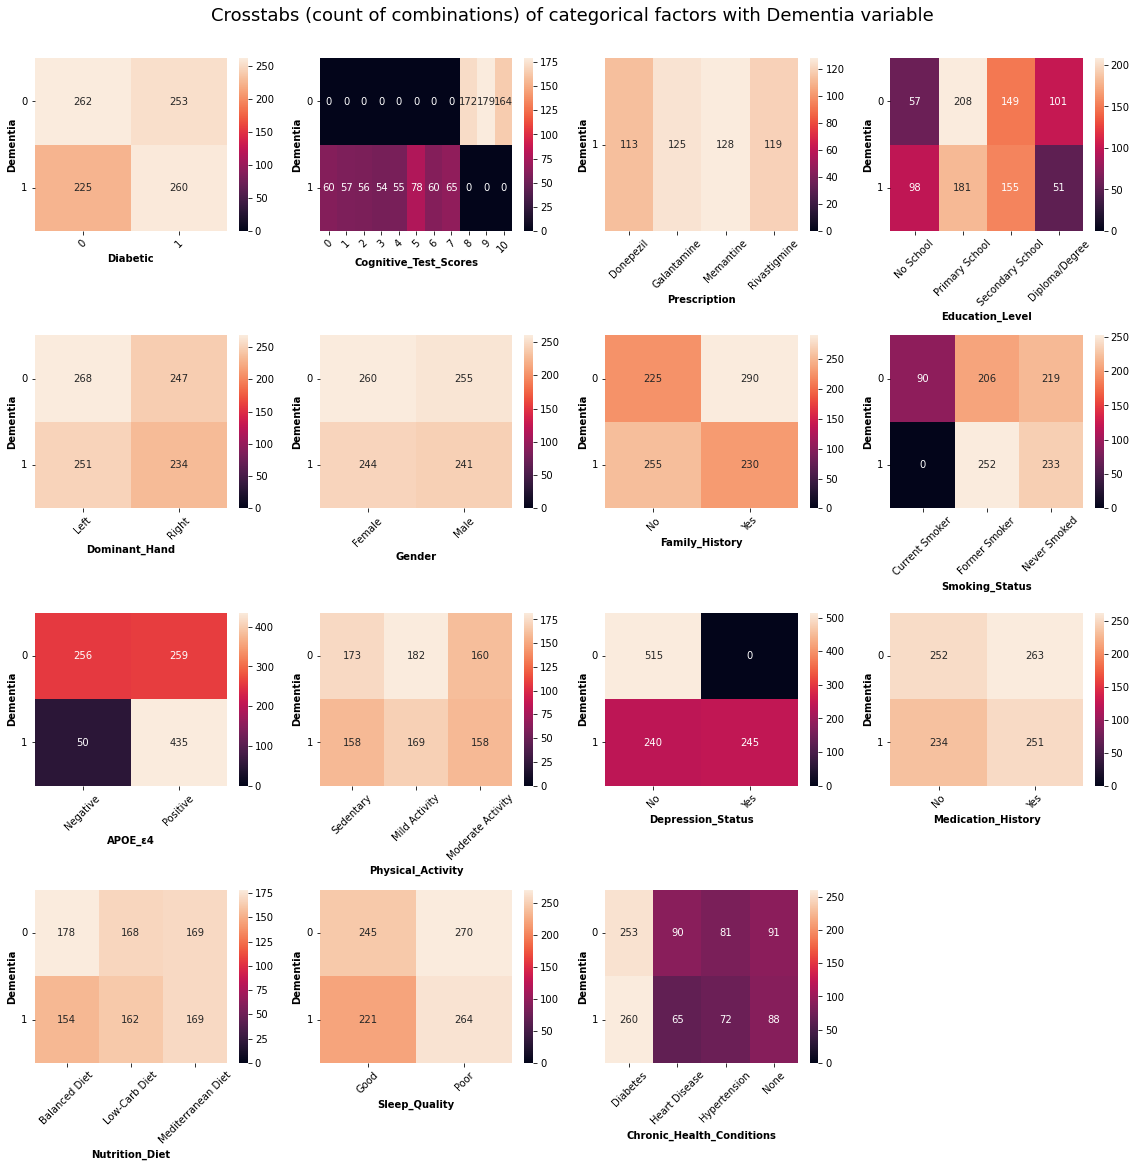

In [72]:
categorical_columns = categorical_numeric_columns + categorical_non_numeric_columns
rows_in_grid = 4
plt.figure(figsize=(4 * rows_in_grid, 4 * rows_in_grid))
index = 1
for column in categorical_columns:
        if column != 'Dementia':
                if column == 'Education_Level':
                        category_order = ['No School', 'Primary School', 'Secondary School', 'Diploma/Degree']
                        df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=category_order, ordered=True)
                if column == 'Physical_Activity':
                        category_order = ['Sedentary', 'Mild Activity', 'Moderate Activity']
                        df['Physical_Activity'] = pd.Categorical(df['Physical_Activity'], categories=category_order, ordered=True)
                matrix = pd.crosstab(df['Dementia'], df[column])
                plot = plt.subplot(rows_in_grid, 4, index)
                sns.heatmap(matrix, annot=True, fmt=".0f", vmin=0, vmax=matrix.values.max())
                plt.xticks(rotation=45)
                plt.yticks(rotation=0)
                plot.set_xlabel(column, weight='bold')
                plot.set_ylabel('Dementia', weight='bold') 
                index += 1
plt.suptitle('Crosstabs (count of combinations) of categorical factors with Dementia variable', fontsize=18, y=1.01)
plt.tight_layout()
plt.show()

### Rozkłady zmiennych numerycznych na wykresach skrzypcowych

In [271]:
type(df[column])

pandas.core.series.Series

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

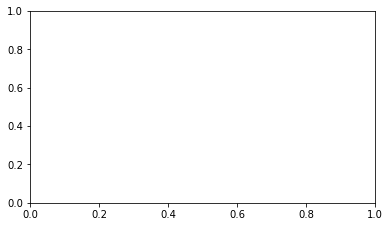

In [279]:
rows_in_grid = 3
plt.figure(figsize=(7 * 3, 4 * rows_in_grid))
index = 1
for column in quantitative_columns:
    if column != "Diabetic" and column != "Dementia":
        plot = plt.subplot(rows_in_grid, 3, index)
        sns.violinplot(y=df[column], color='lightblue')
        plot.set_xlabel(column, weight='bold', size=15)
        plt.xticks(size=12)
        index += 1
plt.suptitle('Violinplots of continuous variables', fontsize=20, y=1.01)
plt.show()

# KM2 - Inżynieria cech i wstępne modelowanie

### Transformacja zmiennych na numeryczne

In [102]:
dementia_conv = df
dementia_conv['Family_History'] = dementia_conv['Family_History'].replace({'Yes' : 1, 'No' : 0})
dementia_conv['Gender'] = dementia_conv['Gender'].replace({'Female' : 1, 'Male' : 0})
dementia_conv['Depression_Status'] = dementia_conv['Depression_Status'].replace({'Yes' : 1, 'No' : 0})
dementia_conv['Medication_History'] = dementia_conv['Medication_History'].replace({'Yes' : 1, 'No' : 0})
dementia_conv['Sleep_Quality'] = dementia_conv['Sleep_Quality'].replace({'Good' : 1, 'Poor' : 0})
dementia_conv['Physical_Activity'] = dementia_conv['Physical_Activity'].replace({'Moderate Activity' : 1, 'Mild Activity' : 0.5, 'Sedentary' : 0})
dementia_conv['Smoking_Status'] = dementia_conv['Smoking_Status'].replace({'Current Smoker' : 1, 'Former Smoker' : 0.5, 'Never Smoked' : 0})
dementia_conv['APOE_ε4'] = dementia_conv['APOE_ε4'].replace({'Positive' : 1, 'Negative' : 0})
dementia_conv['Left_Hand'] = dementia_conv['Dominant_Hand'].replace({'Left' : 1, 'Right' : 0})
dementia_conv['Education_Level'] = dementia_conv['Education_Level'].replace({'Diploma/Degree' : 1, 'Secondary School' : 2/3, 'Primary School' : 1/3,  'No School' : 0})
dummies = pd.get_dummies(dementia_conv['Chronic_Health_Conditions'])
dementia_conv = pd.concat([dementia_conv, dummies], axis=1)
dummies2 = pd.get_dummies(dementia_conv['Nutrition_Diet'])
dementia_conv = pd.concat([dementia_conv, dummies2], axis=1)
dummies3 = pd.get_dummies(dementia_conv['Prescription'])
dementia_conv = pd.concat([dementia_conv, dummies3], axis=1)

for column in dementia_conv.columns:
    if dementia_conv[column].dtype == bool:
        dementia_conv[column] = dementia_conv[column].astype(int)

dementia_conv = dementia_conv.drop(columns=['Diabetic', 'Nutrition_Diet', 'Chronic_Health_Conditions', 'Dominant_Hand', 'None'])
dementia_conv['Education_Level'] = dementia_conv['Education_Level'].astype(float)
dementia_conv['Education_Level'] = dementia_conv['Education_Level'].round(2)

#### Usunięcie zmiennych dot. przepisanego leku i jego dawki, ponieważ są one jednoznacznie związane z występowaniem demencji

In [103]:
dementia_conv = dementia_conv.drop(columns=['Donepezil', 'Galantamine', 'Memantine', 'Rivastigmine', 'Prescription', 'Dosage in mg'])
dementia_conv

,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Gender,Family_History,...,Medication_History,Sleep_Quality,Dementia,Left_Hand,Diabetes,Heart Disease,Hypertension,Balanced Diet,Low-Carb Diet,Mediterranean Diet
0,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,0.33,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,0.67,0,0,...,1,0,1,0,0,1,0,0,1,0
2,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,0.33,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,0.67,1,1,...,1,0,1,1,0,0,1,1,0,0
4,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,0.67,0,1,...,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.081825,87,93.851963,36.495134,50.380106,42.318663,88,1.00,0,1,...,0,0,1,1,1,0,0,1,0,0
996,0.145249,97,94.522391,36.270804,94.006484,52.812568,80,0.33,1,0,...,1,0,0,1,1,0,0,0,1,0
997,0.073692,65,98.578388,37.065703,80.088613,13.640229,67,0.33,1,0,...,1,1,0,0,1,0,0,1,0,0
998,0.037347,71,91.298580,37.037202,95.322210,17.445715,62,0.00,0,1,...,0,1,1,1,0,0,0,0,1,0


In [104]:
dementia_conv.iloc[:, 0:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AlcoholLevel      1000 non-null   float64
 1   HeartRate         1000 non-null   int64  
 2   BloodOxygenLevel  1000 non-null   float64
 3   BodyTemperature   1000 non-null   float64
 4   Weight            1000 non-null   float64
 5   MRI_Delay         1000 non-null   float64
 6   Age               1000 non-null   int64  
 7   Education_Level   1000 non-null   float64
 8   Gender            1000 non-null   int64  
 9   Family_History    1000 non-null   int64  
 10  Smoking_Status    1000 non-null   float64
 11  APOE_ε4           1000 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 93.9 KB


In [109]:
dementia_conv.iloc[:, 12:25].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Physical_Activity      1000 non-null   category
 1   Depression_Status      1000 non-null   int64   
 2   Cognitive_Test_Scores  1000 non-null   int64   
 3   Medication_History     1000 non-null   int64   
 4   Sleep_Quality          1000 non-null   int64   
 5   Dementia               1000 non-null   int64   
 6   Left_Hand              1000 non-null   int64   
 7   Diabetes               1000 non-null   uint8   
 8   Heart Disease          1000 non-null   uint8   
 9   Hypertension           1000 non-null   uint8   
 10  Balanced Diet          1000 non-null   uint8   
 11  Low-Carb Diet          1000 non-null   uint8   
 12  Mediterranean Diet     1000 non-null   uint8   
dtypes: category(1), int64(6), uint8(6)
memory usage: 54.0 KB


### Macierz korelacji dla nowo utworzonych zmiennych

##### Wartości korelacji między zmienną 'demencja' a pozostałymi zmiennymi

In [110]:
correlation_matrix_conv = dementia_conv.dropna(axis=1).corr()
selected_correlation_matrix_conv = correlation_matrix_conv[['Dementia']].drop(['Dementia'])
selected_correlation_matrix_conv

C:\Users\Ola\AppData\Local\Temp\ipykernel_18568\1621382500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_conv = dementia_conv.dropna(axis=1).corr()


,Dementia
AlcoholLevel,-0.003720
HeartRate,0.012276
BloodOxygenLevel,-0.071454
BodyTemperature,0.033928
Weight,-0.049563
MRI_Delay,0.031251
Age,-0.062154
Education_Level,-0.129994
Gender,-0.001761
Family_History,-0.088911


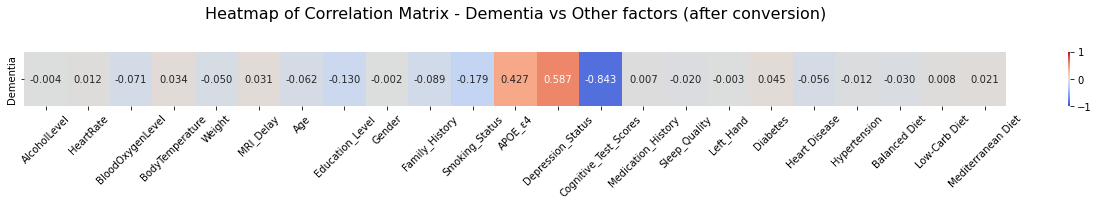

In [111]:
plt.figure(figsize=(22, 1))
sns.heatmap(selected_correlation_matrix_conv.transpose(), annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix - Dementia vs Other factors (after conversion)', fontsize=16, y=1.5)
plt.xticks(rotation=45)
plt.show()

#### Heatmapa wzajemnych korelacji między wszystkimi zmiennymi

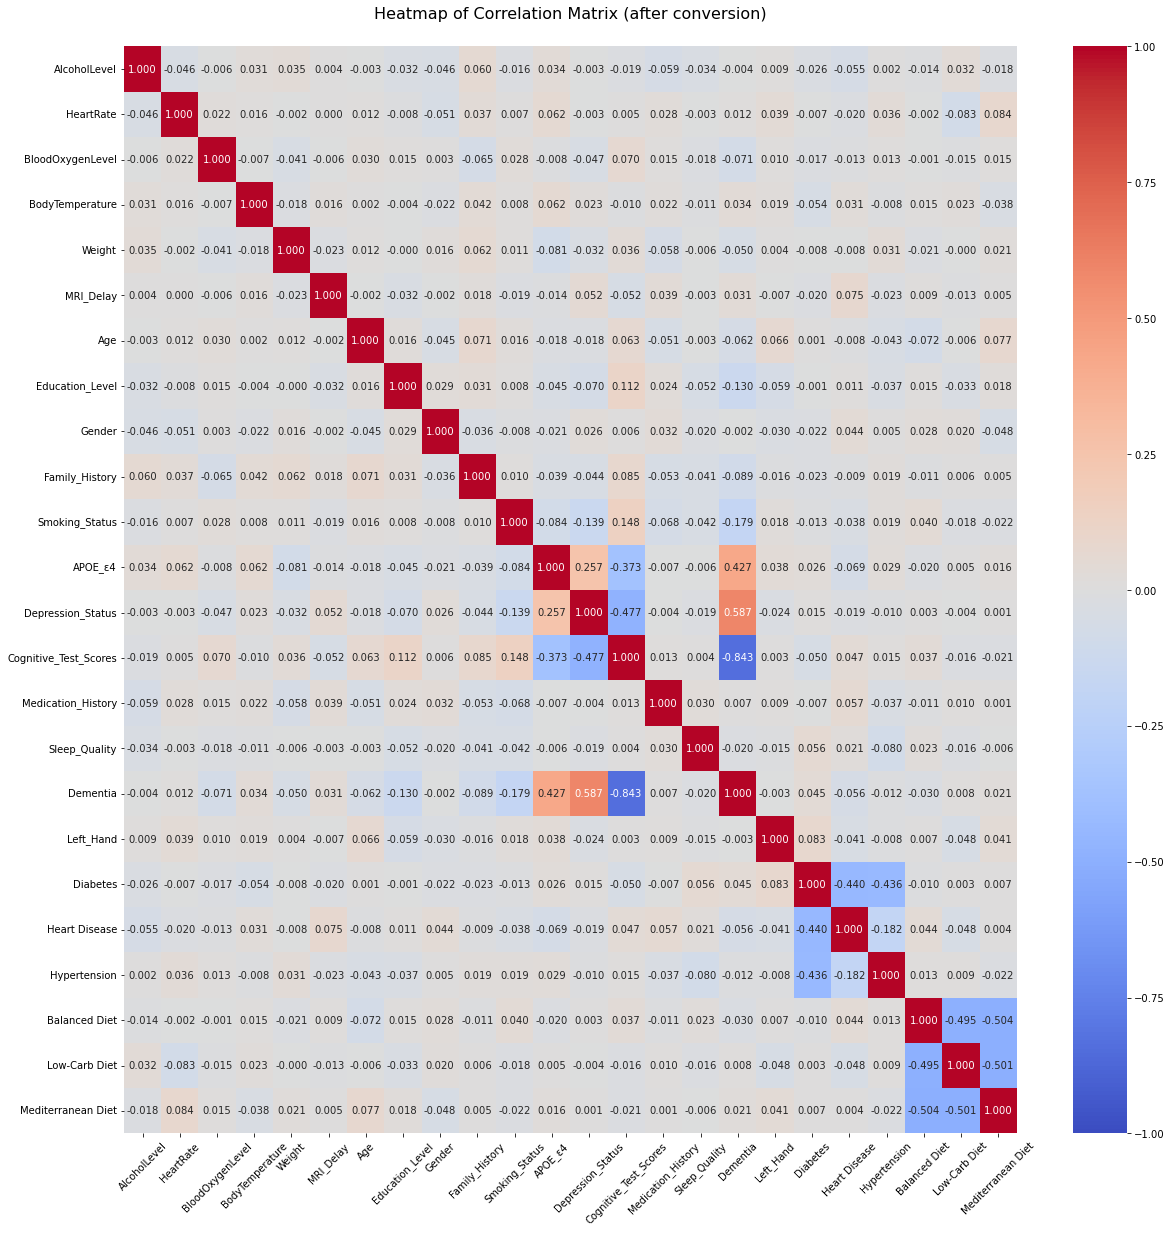

In [112]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_conv.transpose(), annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix (after conversion)', fontsize=16, y=1.02)
plt.xticks(rotation=45)
plt.show()

### Zliczenia wartości zmiennych kategorycznych (włącznie ze zmienną 'demencja')

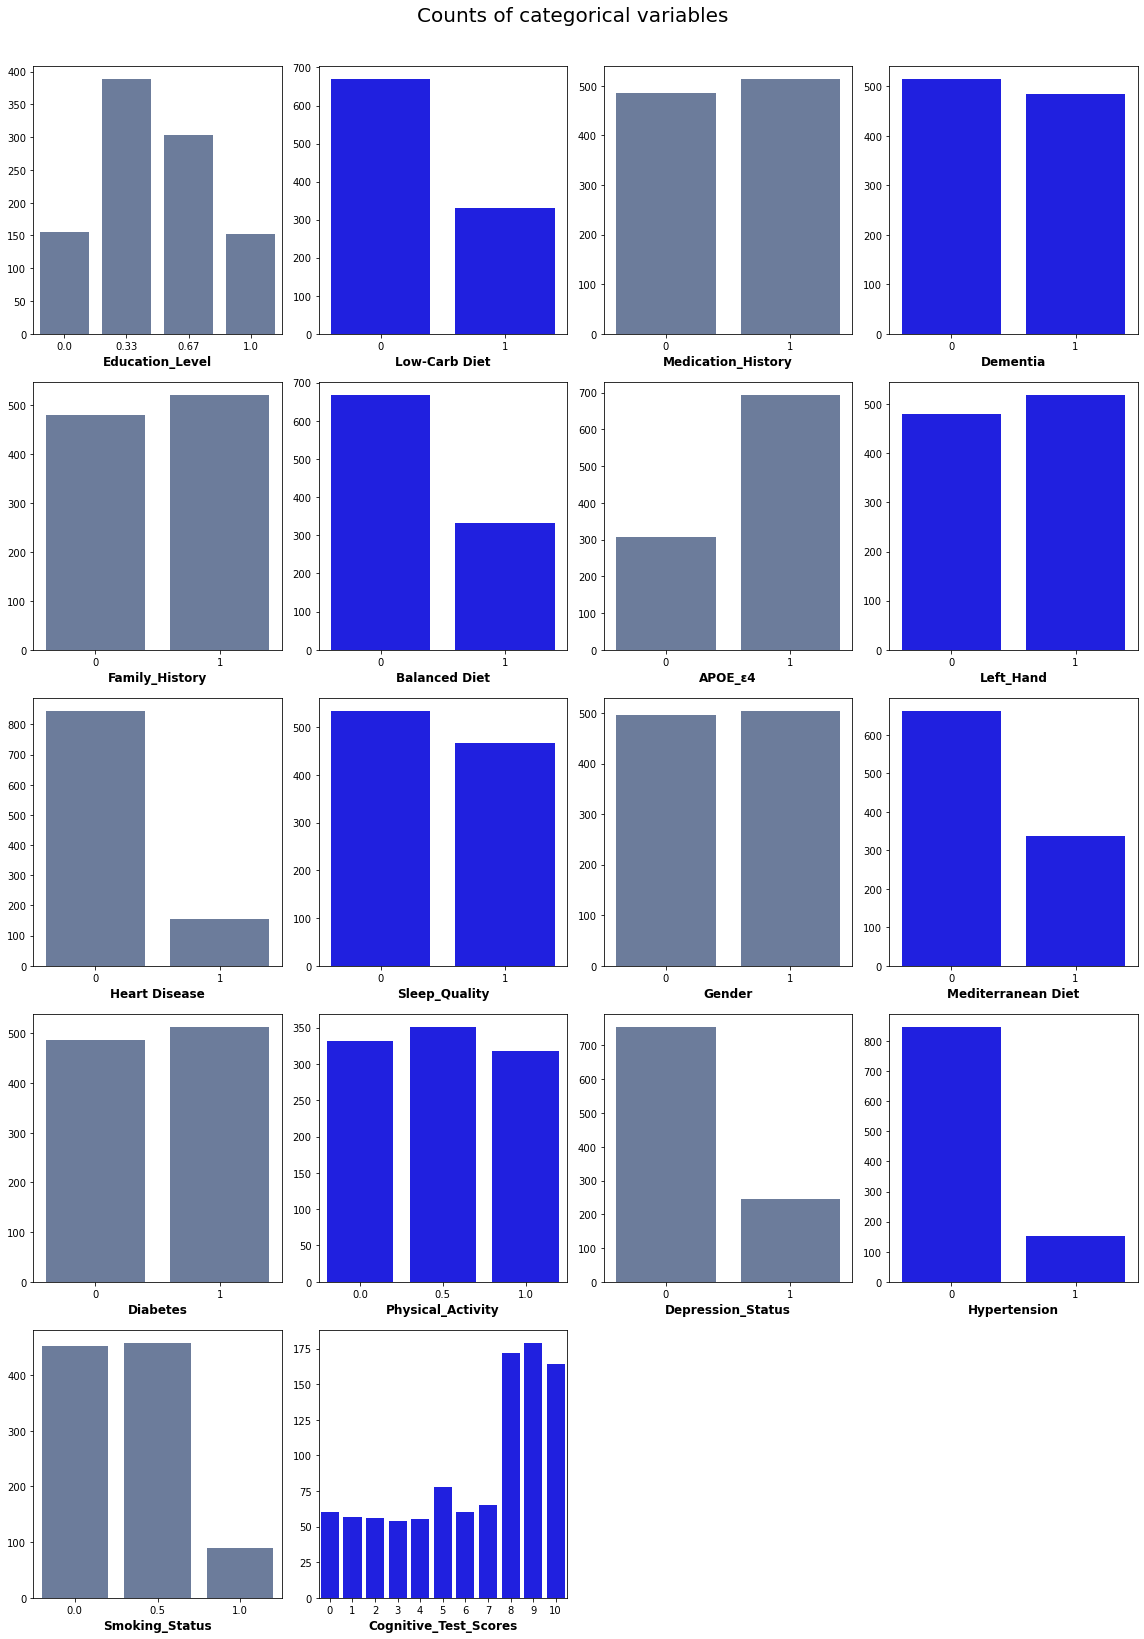

In [113]:
rows_in_grid = 5
plt.figure(figsize=(4 * 4, 4.5 * 5))
index = 1
for column in list(set(dementia_conv.columns) - set(quantitative_columns)):
    ax = plt.subplot(rows_in_grid, 4, index)
    total_counts = dementia_conv[column].value_counts()
    if index % 2 == 0:
        sns.barplot(x=total_counts.index, y=total_counts.values, color='blue')
    else:
        sns.barplot(x=total_counts.index, y=total_counts.values, color='#647AA3')
    ax.set_xlabel(column, weight='bold', size=12)
    index +=1
plt.suptitle('Counts of categorical variables', fontsize=20, y=1.01)
plt.tight_layout()
plt.show()

## Feauture importance
Próba redukcji wymiarów, która nie przyniosła żadnych istotnych rezultatów ze względu na dominację jednej zmiennej i brak możliwości wskazania głównych składowych, które by w dużym stopniu wyjaśniały zjawisko.

### PCA

In [286]:
from sklearn.decomposition import PCA
X = dementia_conv.drop('Dementia', axis=1)
pca = PCA(n_components=4)  
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {variance:.2f}")

total_variance_explained = sum(explained_variance_ratio)
print(f"\nTotal variance explained by selected components: {total_variance_explained:.2f}")
X_pca

components = pca.components_

for i, component in enumerate(components):
    print(f"Kolumny będące kombinacją liniową dla komponentu {i+1}:")
    for j, coefficient in enumerate(component):
        print(f"- Kolumna {X.columns[j]}: {coefficient:.2f}")
    print()


Explained variance ratio for each component:
Component 1: 0.38
Component 2: 0.28
Component 3: 0.20
Component 4: 0.11

Total variance explained by selected components: 0.97
Kolumny będące kombinacją liniową dla komponentu 1:
- Kolumna AlcoholLevel: -0.00
- Kolumna HeartRate: -0.00
- Kolumna BloodOxygenLevel: 0.00
- Kolumna BodyTemperature: -0.00
- Kolumna Weight: 0.07
- Kolumna MRI_Delay: -1.00
- Kolumna Age: 0.00
- Kolumna Education_Level: 0.00
- Kolumna Gender: 0.00
- Kolumna Family_History: -0.00
- Kolumna Smoking_Status: 0.00
- Kolumna APOE_ε4: 0.00
- Kolumna Physical_Activity: 0.00
- Kolumna Depression_Status: -0.00
- Kolumna Cognitive_Test_Scores: 0.01
- Kolumna Medication_History: -0.00
- Kolumna Sleep_Quality: 0.00
- Kolumna Left_Hand: 0.00
- Kolumna Diabetes: 0.00
- Kolumna Heart Disease: -0.00
- Kolumna Hypertension: 0.00
- Kolumna Balanced Diet: -0.00
- Kolumna Low-Carb Diet: 0.00
- Kolumna Mediterranean Diet: -0.00

Kolumny będące kombinacją liniową dla komponentu 2:
- Kolum

In [287]:
X_pca
pca.components_

array([[-6.89813969e-06, -3.72549595e-04,  5.92254701e-04,
        -4.36363085e-04,  7.39319855e-02, -9.97199849e-01,
         2.24593285e-03,  5.86129152e-04,  8.75655591e-05,
        -4.12611925e-04,  3.79106036e-04,  2.29846066e-04,
         2.32965448e-05, -1.40901343e-03,  1.06317417e-02,
        -1.25874966e-03,  7.45668012e-05,  2.09232446e-04,
         5.85548478e-04, -1.61027616e-03,  5.21556743e-04,
        -2.77335129e-04,  3.66443124e-04, -8.91079952e-05],
       [ 1.42143300e-04, -4.65526395e-03, -8.71941482e-03,
        -4.90108765e-04,  9.97097939e-01,  7.40287907e-02,
         1.20374010e-02, -6.06330045e-05,  5.38171455e-04,
         2.21987706e-03,  2.07516850e-04, -2.63952345e-03,
        -9.51640023e-04, -8.56222152e-04,  7.31266273e-03,
        -1.90609434e-03, -1.97877020e-04,  1.19431858e-04,
        -3.21284329e-04, -2.69787377e-05,  7.21781686e-04,
        -6.63418914e-04, -3.08638068e-05,  6.94282721e-04],
       [-2.24014011e-04,  9.99743984e-01,  5.79232641e

In [288]:
dementia_conv['Komponent_1'] = -1*dementia_conv['MRI_Delay'] + 0.07*dementia_conv['Weight'] + 0.01*dementia_conv['Cognitive_Test_Scores']

In [289]:
dementia_conv[['Komponent_1', 'Weight', 'HeartRate', 'Age']]

,Komponent_1,Weight,HeartRate,Age
0,-32.291550,57.563978,98,60
1,-27.169370,56.832335,78,61
2,-33.377301,59.759066,89,69
3,-46.545339,58.266471,60,78
4,-23.071249,67.705027,67,77
...,...,...,...,...
995,-38.742055,50.380106,87,88
996,-46.142114,94.006484,97,80
997,-7.954026,80.088613,65,67
998,-10.753160,95.322210,71,62


### LDA

In [290]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
y = dementia_conv['Dementia']
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
X_lda

array([[-2.61470780e+00],
       [ 2.61955966e+00],
       [-1.44319372e+00],
       [ 1.27847637e+00],
       [ 2.98269295e+00],
       [ 4.02652737e+00],
       [-1.43569745e-01],
       [-2.07988924e+00],
       [-1.83387616e+00],
       [ 5.61105105e-01],
       [-1.47843408e+00],
       [-1.03276730e+00],
       [-5.67502532e-01],
       [-2.53125610e+00],
       [-1.81964521e+00],
       [-2.50333528e+00],
       [ 1.27078963e+00],
       [-1.42914248e+00],
       [ 3.00513913e+00],
       [ 1.44804111e+00],
       [ 3.11843653e+00],
       [-1.71775847e+00],
       [ 8.22933335e-01],
       [ 1.11589579e+00],
       [-1.45249615e+00],
       [-1.38054285e+00],
       [-1.95626024e+00],
       [ 2.79300498e+00],
       [-9.86543638e-01],
       [-1.43408038e+00],
       [ 3.63606695e+00],
       [-1.47336869e+00],
       [ 7.88455339e-01],
       [ 3.92619627e+00],
       [-1.67215977e+00],
       [ 2.28529923e+00],
       [-1.52396069e+00],
       [ 8.44109089e-01],
       [-1.3

### SVD

In [292]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
X_svd

array([[166.20790873,  -8.72592305],
       [153.884608  ,  -5.43327547],
       [165.81353376,  -9.801744  ],
       ...,
       [161.09508036,  16.04944018],
       [164.76931689,  15.205323  ],
       [169.75924934,  -2.06886385]])

### Random forest

In [293]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_importance

array([0.01176189, 0.01118555, 0.01579524, 0.01643512, 0.01797404,
       0.01344294, 0.01485426, 0.00874791, 0.00156242, 0.00300437,
       0.0266776 , 0.05576373, 0.00305352, 0.13174758, 0.65116913,
       0.00193751, 0.00294185, 0.00204947, 0.00207434, 0.00159884,
       0.00194976, 0.00145966, 0.00159478, 0.00121849])

### Wybór 10 zmiennych o największej korelacji ze zmienną 'demencja'

In [118]:
high_correlation_columns = abs(selected_correlation_matrix_conv['Dementia']).nlargest(10)
high_correlation_columns

Cognitive_Test_Scores    0.843247
Depression_Status        0.587006
APOE_ε4                  0.427292
Smoking_Status           0.179253
Education_Level          0.129994
Family_History           0.088911
BloodOxygenLevel         0.071454
Age                      0.062154
Heart Disease            0.056256
Weight                   0.049563
Name: Dementia, dtype: float64

In [119]:
dementia_conv_high10 = dementia_conv[['Dementia', 'Cognitive_Test_Scores', 'Depression_Status', 'APOE_ε4', 'Smoking_Status', 'Education_Level', 'Family_History', 'BloodOxygenLevel', 'Age', 'Heart Disease', 'Weight']]
dementia_conv_high10

,Dementia,Cognitive_Test_Scores,Depression_Status,APOE_ε4,Smoking_Status,Education_Level,Family_History,BloodOxygenLevel,Age,Heart Disease,Weight
0,0,10,0,0,1.0,0.33,0,96.230743,60,0,57.563978
1,1,1,0,1,0.5,0.67,0,93.032122,61,1,56.832335
2,0,8,0,0,0.5,0.33,1,93.566504,69,1,59.759066
3,1,5,1,0,0.0,0.67,1,93.906510,78,0,58.266471
4,1,0,0,1,0.0,0.67,1,97.508994,77,0,67.705027
...,...,...,...,...,...,...,...,...,...,...,...
995,1,5,0,1,0.0,1.00,1,93.851963,88,0,50.380106
996,0,9,0,0,0.0,0.33,0,94.522391,80,0,94.006484
997,0,8,0,1,0.0,0.33,0,98.578388,67,0,80.088613
998,1,2,1,1,0.0,0.00,1,91.298580,62,0,95.322210


### Podział zbioru 'dementia_conv_high10' na zbiór treningowy, testowy i walidacyjny

In [120]:
from sklearn.model_selection import train_test_split

In [185]:
path = 'C:\\Users\\User\\DataspellProjects\\AleksandraWojcikJanOpalaEDA_Projekt1'

X = dementia_conv_high10.drop('Dementia', axis=1)
y = dementia_conv_high10['Dementia']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25, random_state=42, stratify=y_train_val)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.to_csv(path + '\\train.csv', index=False)
df_val.to_csv(path + '\\val.csv', index=False)
df_test.to_csv(path + '\\test.csv', index=False)

### Wstępne modelowanie

In [186]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Baseline

In [187]:
dc = DummyClassifier(strategy='uniform', random_state=42)
dc.fit(X_train,y_train)
y_pr = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)


Dokładność: 0.52
Precyzja: 0.5
Czułość: 0.5833333333333334
F1-score: 0.5384615384615384
Macierz pomyłek:
 [[24 28]
 [20 28]]


In [188]:
dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_pr = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.41
Precyzja: 0.3829787234042553
Czułość: 0.375
F1-score: 0.37894736842105264
Macierz pomyłek:
 [[23 29]
 [30 18]]


In [189]:
dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train,y_train)
y_pr = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat, zero_division=0)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.52
Precyzja: 0.0
Czułość: 0.0
F1-score: 0.0
Macierz pomyłek:
 [[52  0]
 [48  0]]


#### Regresja logistyczna

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
lr = LogisticRegression(max_iter=100, penalty='none')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


In [192]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


In [193]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


#### SVM

In [194]:
from sklearn.svm import SVC

In [195]:
svm = SVC()

svm.fit(X_train,y_train)
y_hat = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.88
Precyzja: 1.0
Czułość: 0.75
F1-score: 0.8571428571428571
Macierz pomyłek:
 [[52  0]
 [12 36]]


#### Drzewo decyzyjne

In [196]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [197]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


#### KNeighbours Classifier

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.9
Precyzja: 0.975
Czułość: 0.8125
F1-score: 0.8863636363636362
Macierz pomyłek:
 [[51  1]
 [ 9 39]]


### Wybór 4 zmiennych o największej korelacji ze zmienną 'demencja'

In [200]:
high_correlation_columns2 = abs(selected_correlation_matrix_conv['Dementia']).nlargest(4)
high_correlation_columns2

Cognitive_Test_Scores    0.843247
Depression_Status        0.587006
APOE_ε4                  0.427292
Smoking_Status           0.179253
Name: Dementia, dtype: float64

In [201]:
dementia_conv_high4 = dementia_conv[['Dementia', 'Cognitive_Test_Scores', 'Depression_Status', 'APOE_ε4', 'Smoking_Status']]
dementia_conv_high4

,Dementia,Cognitive_Test_Scores,Depression_Status,APOE_ε4,Smoking_Status
0,0,10,0,0,1.0
1,1,1,0,1,0.5
2,0,8,0,0,0.5
3,1,5,1,0,0.0
4,1,0,0,1,0.0
...,...,...,...,...,...
995,1,5,0,1,0.0
996,0,9,0,0,0.0
997,0,8,0,1,0.0
998,1,2,1,1,0.0


### Podział zbioru 'dementia_conv_high4' na zbiór treningowy, testowy i walidacyjny

In [217]:
path = 'C:\\Users\\Ola\\DataspellProjects\\AleksandraWojcikJanOpalaEDA_Projekt1'

X = dementia_conv_high4.drop('Dementia', axis=1)
y = dementia_conv_high4['Dementia']

X_train_val, X_test4, y_train_val, y_test4 = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25, random_state=42, stratify=y_train_val)

df_train = pd.concat([X_train4, y_train4], axis=1)
df_val = pd.concat([X_val4, y_val4], axis=1)
df_test = pd.concat([X_test4, y_test4], axis=1)

df_train.to_csv(path + '\\train2.csv', index=False)
df_val.to_csv(path + '\\val2.csv', index=False)
df_test.to_csv(path + '\\test2.csv', index=False)

### Wstępne modelowanie

#### Regresja logistyczna

In [219]:
lr = LogisticRegression(max_iter=50, penalty='none')

lr.fit(X_train4,y_train4)
y_hat = lr.predict(X_test4)

accuracy = accuracy_score(y_test4, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test4, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test4, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test4, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test4, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


In [220]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1')

lr.fit(X_train4,y_train4)
y_hat = lr.predict(X_test4)

accuracy = accuracy_score(y_test4, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test4, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test4, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test4, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test4, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


In [221]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')

lr.fit(X_train4,y_train4)
y_hat = lr.predict(X_test4)

accuracy = accuracy_score(y_test4, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test4, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test4, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test4, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test4, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.97
Precyzja: 1.0
Czułość: 0.9375
F1-score: 0.967741935483871
Macierz pomyłek:
 [[52  0]
 [ 3 45]]


#### SVM

In [222]:
svm = SVC()

svm.fit(X_train4,y_train4)
y_hat = svm.predict(X_test4)

accuracy = accuracy_score(y_test4, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test4, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test4, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test4, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test4, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


#### KNeighbours Classifier

In [223]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train4, y_train4)
y_hat = knn.predict(X_test4)

accuracy = accuracy_score(y_test4, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test4, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test4, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test4, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test4, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 1.0
Precyzja: 1.0
Czułość: 1.0
F1-score: 1.0
Macierz pomyłek:
 [[52  0]
 [ 0 48]]


# Finalizacja

### Zaawansowane modelowanie - AutoML

In [280]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [281]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

def accuracy_metric(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

def gini_metric(y_true, y_pred):
    return 2*roc_auc_score(y_true, y_pred)-1

task = Task('binary', metric = f1_metric)

In [282]:
roles = {'target': 'Dementia'}

In [283]:
automl = TabularAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = 4, 
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned']]})

#### Korzystamy z zestawu danych z 4 zmiennymi o największej korelacji ze zmienną 'demencja' - dementia_conv_high4

In [284]:
train_data4, valid_data4 = train_test_split(dementia_conv_high4, 
                                       test_size=0.1, 
                                       stratify=dementia_conv_high4['Dementia'], 
                                       random_state=42)
print('train_data shape = {}, \nvalid_data shape = {}'.format(train_data4.shape, valid_data4.shape))

train_data shape = (900, 5), 
valid_data shape = (100, 5)


In [285]:
oof_pred4 = automl.fit_predict(train_data4, roles = roles)

In [251]:
print('OOF accuracy: {}'.format(accuracy_metric(train_data4['Dementia'].values, oof_pred4.data[:, 0])))
print('OOF f1: {}'.format(f1_metric(train_data4['Dementia'].values, oof_pred4.data[:, 0])))
print('OOF gini: {}'.format(gini_metric(train_data4['Dementia'].values, oof_pred4.data[:, 0])))

OOF accuracy: 1.0
OOF f1: 1.0
OOF gini: 1.0


#### Korzystamy z zestawu danych z 10 zmiennymi o największej korelacji ze zmienną 'demencja' - dementia_conv_high10

In [249]:
train_data10, valid_data10 = train_test_split(dementia_conv_high10, 
                                       test_size=0.1, 
                                       stratify=dementia_conv_high10['Dementia'], 
                                       random_state=42)
print('train_data shape = {}, \nvalid_data shape = {}'.format(train_data10.shape, valid_data10.shape))

train_data shape = (900, 11), 
valid_data shape = (100, 11)


In [250]:
oof_pred10 = automl.fit_predict(train_data10, roles = roles)

In [252]:
print('OOF accuracy: {}'.format(accuracy_metric(train_data10['Dementia'].values, oof_pred10.data[:, 0])))
print('OOF f1: {}'.format(f1_metric(train_data10['Dementia'].values, oof_pred10.data[:, 0])))
print('OOF gini: {}'.format(gini_metric(train_data10['Dementia'].values, oof_pred10.data[:, 0])))

OOF accuracy: 1.0
OOF f1: 1.0
OOF gini: 1.0


## Wyjaśnialna sztuczna inteligencja

In [294]:
import dalex as dx
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier

### Stworzenie wyjaśnialnego modelu klasyfikacji

Tworzymy pipeline bez transformera, ponieważ już uprzednio dokonaliśmy odpowiedniej transformacji zmiennych.

In [295]:
classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500, random_state=0)

clf = Pipeline(steps=[
    ('classifier', classifier)
])

In [296]:
clf.fit(X_train4, y_train4)

Pipeline(steps=[('classifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500,
                               random_state=0))])

In [297]:
exp = dx.Explainer(clf, X_train4, y_train4)

Preparation of a new explainer is initiated

  -> data              : 675 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 675 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001E31AA2D940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.32e-05, mean = 0.488, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0415, mean = -0.00238, max = 0.148
  -> model_info        : package sklearn

A new explainer has been created!


In [298]:
model_performance = exp.model_performance(model_type="classification")
model_performance.result

,recall,precision,f1,accuracy,auc
MLPClassifier,1.0,1.0,1.0,1.0,1.0


In [299]:
model_performance.plot()

### Istotność zmiennych

Sprawdźmy, jaka jest istotność zmiennych według modelu wyjaśnialnego.

In [300]:
variable_importance = exp.model_parts(N=1000, B=15, random_state=11)

In [301]:
variable_importance.result

,variable,dropout_loss,label
0,Smoking_Status,0.000000e+00,MLPClassifier
1,APOE_ε4,7.401487e-18,MLPClassifier
2,_full_model_,7.401487e-18,MLPClassifier
3,Depression_Status,2.382735e-02,MLPClassifier
4,Cognitive_Test_Scores,3.600891e-01,MLPClassifier
5,_baseline_,4.950757e-01,MLPClassifier


In [302]:
variable_importance.plot()

Powtórzmy sprawdzanie istotności zmiennych, ale dla zestawu danych z 10 najważniejszymi zmiennymi:

In [304]:
clf.fit(X_train, y_train)
exp2 = dx.Explainer(clf, X_train, y_train)
exp2.model_performance(model_type="classification").plot()

Preparation of a new explainer is initiated

  -> data              : 675 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 675 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001E31AA2D940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.32e-06, mean = 0.471, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.162, mean = 0.0152, max = 0.915
  -> model_info        : package sklearn

A new explainer has been created!


In [305]:
vi2 = exp2.model_parts(N=1000, B=15, random_state=11)
vi2.plot()

W ramach eksploracji chcielibyśmy również zobaczyć, jakie byłyby statystyki modelu i istotności zmiennych, gdybyśmy usunęli wyniki testu poznawczego (Cognitive_Test_Scores).

In [306]:
X_noncog = X_train.drop("Cognitive_Test_Scores", axis = 1)
clf.fit(X_noncog, y_train)
exp3 = dx.Explainer(clf, X_noncog, y_train)
exp3.model_performance(model_type="classification").result

Preparation of a new explainer is initiated

  -> data              : 675 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 675 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001E31AA2D940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0352, mean = 0.605, max = 0.997
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.85, mean = -0.119, max = 0.881
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
MLPClassifier,0.917683,0.677928,0.779793,0.748148,0.887731


In [307]:
performance = exp3.model_performance(model_type="classification")

print("Dokładność:", performance.result['accuracy'])
print("Precyzja:", performance.result['precision'])
print("Czułość:", performance.result['recall'])
print("F1-score:", performance.result['f1'])


Dokładność: MLPClassifier    0.748148
Name: accuracy, dtype: float64
Precyzja: MLPClassifier    0.677928
Name: precision, dtype: float64
Czułość: MLPClassifier    0.917683
Name: recall, dtype: float64
F1-score: MLPClassifier    0.779793
Name: f1, dtype: float64


In [308]:
exp3.model_performance(model_type="classification").plot()

In [309]:
vi3 = exp3.model_parts(N=1000, B=15, random_state=11)
vi3.plot()

### Agregacja
Dla ramki bez cognitive_test_scores (model exp3) sprawdźmy zależność cząstkową (partial dependency) jak i efekt skumulowanych efektów lokalnych (accumulated local effects). Nie użyjemy modelu exp ze względu na zbyt niewielką liczbę zmiennych.

In [310]:
pdp_num = exp3.model_profile(type = 'partial', label = "pdp", N = 500)
ale_num = exp3.model_profile(type = 'accumulated', label="ale", N = 500)
pdp_num.plot(ale_num)

Calculating ceteris paribus:   0%|          | 0/9 [00:00<?, ?it/s]

Calculating accumulated dependency: 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]


In [311]:
pdp_cat = exp3.model_profile(type = 'partial', variable_type='categorical',
                            variables = ["Depression_Status","APOE_ε4"], label="pdp")

ale_cat = exp3.model_profile(type = 'accumulated', variable_type='categorical',
                            variables = ["Depression_Status","APOE_ε4"], label="ale")
ale_cat.plot(pdp_cat)

Calculating accumulated dependency: 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


### Predykcja modelu dla wybranych danych
Sprawdzamy dla ramki bez wyników testów poznawczych.

In [312]:
patient1 = X_noncog.iloc[21]
patient2 = X_noncog.iloc[37]
sh_p1 = exp3.predict_parts(patient1, type="shap", B=50, label=patient1.index[0])
sh_p2 = exp3.predict_parts(patient2, type="shap", B=50, label=patient2.index[0])
sh_p1.plot(sh_p2)

## Sztuczne strojenie modeli
Chcielibyśmy porównać wyniki modeli, które zaproponowaliśmy na etapie wstępnego modelowania, dla ramki danych, w której pozbyliśmy się wyników testów poznawczych (Cognitive_test_scores).

In [ ]:
path = 'C:\\Users\\User\\DataspellProjects\\AleksandraWojcikJanOpalaEDA_Projekt1'

X_train_val, X_test, y_train_val, y_test = train_test_split(dementia_conv_high10.drop('Dementia', axis = 1).drop('Cognitive_Test_Scores', axis=1),
                                                            dementia_conv_high10['Dementia'],
                                                            test_size=0.1, random_state=42, stratify=dementia_conv_high10['Dementia'])

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25, random_state=42, stratify=y_train_val)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.to_csv(path + '\\trainnc.csv', index=False)
df_val.to_csv(path + '\\valnc.csv', index=False)
df_test.to_csv(path + '\\testnc.csv', index=False)

### Baseline dla strategii most_frequent

In [ ]:
dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train,y_train)
y_pr = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.515
Precyzja: 0.0
Czułość: 0.0
F1-score: 0.0
Macierz pomyłek:
 [[103   0]
 [ 97   0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### Regresja logistyczna

In [ ]:
lr = LogisticRegression(max_iter=100, penalty='none')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.715
Precyzja: 0.7857142857142857
Czułość: 0.5670103092783505
F1-score: 0.6586826347305389
Macierz pomyłek:
 [[88 15]
 [42 55]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.715
Precyzja: 0.7941176470588235
Czułość: 0.5567010309278351
F1-score: 0.6545454545454544
Macierz pomyłek:
 [[89 14]
 [43 54]]


### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train,y_train)
y_hat = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.485
Precyzja: 0.4583333333333333
Czułość: 0.3402061855670103
F1-score: 0.3905325443786982
Macierz pomyłek:
 [[64 39]
 [64 33]]


### Drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.775
Precyzja: 0.7708333333333334
Czułość: 0.7628865979381443
F1-score: 0.7668393782383419
Macierz pomyłek:
 [[81 22]
 [23 74]]


### KNeighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Dokładność:", accuracy)

precision = precision_score(y_test, y_hat)
print("Precyzja:", precision)

recall = recall_score(y_test, y_hat)
print("Czułość:", recall)

f1 = f1_score(y_test, y_hat)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_hat)
print("Macierz pomyłek:\n", conf_matrix)

Dokładność: 0.47
Precyzja: 0.4470588235294118
Czułość: 0.3917525773195876
F1-score: 0.4175824175824176
Macierz pomyłek:
 [[56 47]
 [59 38]]


Dla zestawu danych bez zmiennej "cognitive_test_scores" wybraliśmy model Drzewa decyzyjnego jako najlepszy.